In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
os.listdir('./data')

['DJI_ema.csv',
 'DJI_STO_20period_sma10.csv',
 'DJI_modified_sma.csv',
 '.DS_Store',
 'DJI_modified_features - DJI.csv',
 'DJI_fe.csv',
 'N225withoutNULL.csv',
 'dowjone1985_2019.csv',
 'N225fillVOL.csv',
 'test_djia.csv',
 'DJI_denoise.csv',
 'N225.csv',
 'stocknews',
 'preprocessed',
 'downjone5y.csv']

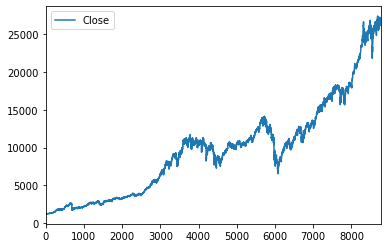

In [3]:
df = pd.read_csv('./data/DJI_fe.csv')
df.head()
df.plot(y='Close')

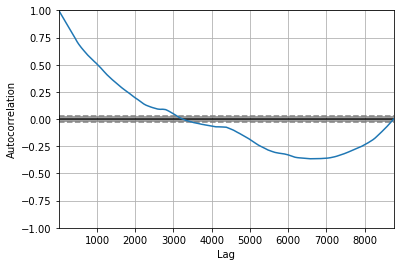

In [4]:
autocorrelation_plot(df['Close'])

In [5]:
model = ARIMA(df['Close'], order=(10, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 8761
Model:                ARIMA(10, 1, 0)   Log Likelihood              -53762.386
Method:                       css-mle   S.D. of innovations            111.901
Date:                Tue, 17 Dec 2019   AIC                         107548.772
Time:                        02:49:20   BIC                         107633.709
Sample:                             1   HQIC                        107577.712
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.9396      1.068      2.751      0.006       0.845       5.034
ar.L1.D.Close     -0.0447      0.011     -4.189      0.000      -0.066      -0.024
ar.L2.D.Close     -0.0358      0.011

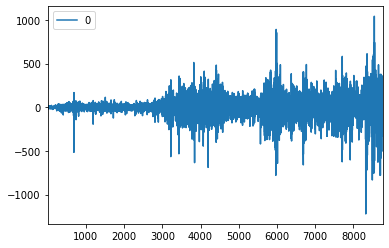

In [6]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

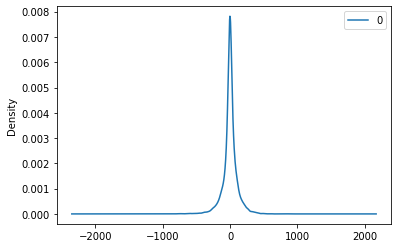

                 0
count  8761.000000
mean     -0.000639
std     111.907838
min   -1221.123263
25%     -32.938252
50%       0.597544
75%      39.213140
max    1041.284172


In [7]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [14]:
X = df['Close'].values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
hist = [x for x in train]
predictions = list()
for t in tqdm(range(len(test))):
    model = ARIMA(hist, order=(10, 1, 0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y_hat = output[0]
    predictions.append(y_hat)
    obs = test[t]
    hist.append(obs)
#     print('predicted=%f, expected=%f' % (y_hat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE : %.3f' % error )


100%|██████████| 1753/1753 [2:18:51<00:00,  4.75s/it]  

Test MSE : 27942.975


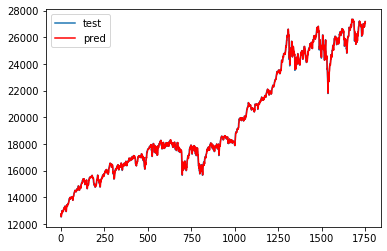

In [15]:
plt.plot(test, label='test')
plt.plot(predictions, color='red', label='pred')
plt.legend()
plt.show()


In [16]:
import numpy as np
predictions = np.array(predictions).reshape(-1)
error = mean_squared_error(test, predictions)
error


27942.97548558719

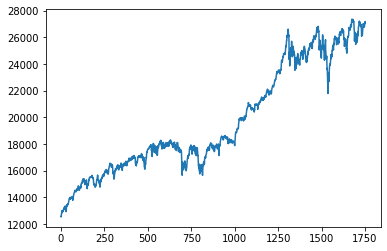

In [17]:
plt.plot(test)

In [18]:
test.shape

(1753,)

In [19]:
predictions

array([12772.68787684, 12597.47083129, 12559.07229314, ...,
       27082.92979241, 27073.90985661, 27185.29626478])